# Simulated image

In [1]:
from prose.tutorials import example_image

<AxesSubplot:>

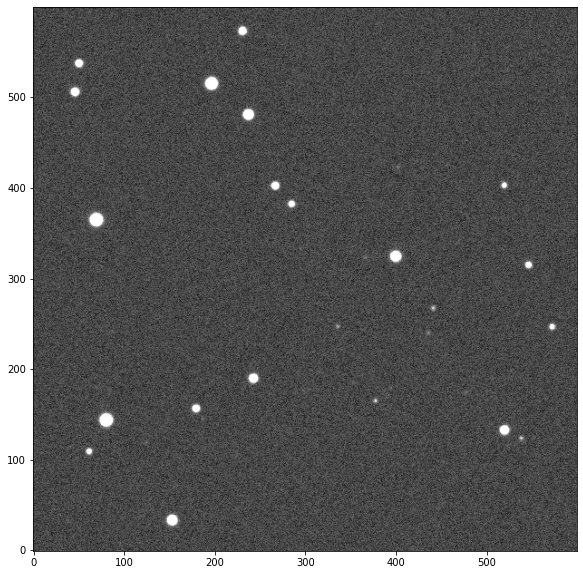

In [2]:
image = example_image()
image.show()

# Blocks

In [3]:
from prose import blocks

## Trim

In [4]:
from prose import blocks
from prose.tutorials import example_image

# our example image
image = example_image()

# Creating and applying the Trim block
trim = blocks.Trim(trim=100)
trimmed_image = trim(image)

Text(0.0, 1.0, 'trimmed image')

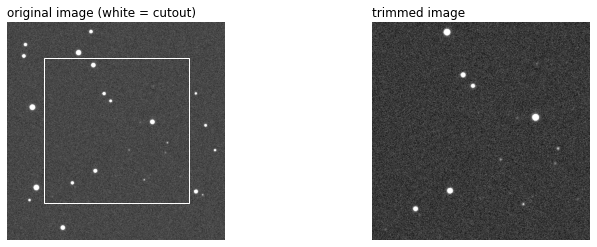

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

ax1 = plt.subplot(121)
image.show(ax=ax1)
trim.draw_cutout(image)
plt.axis("off")
plt.title("original image (white = cutout)", loc="left")

ax2 = plt.subplot(122)
trimmed_image.show(ax=ax2)
plt.axis("off")
plt.title("trimmed image", loc="left")

## FWHM



In [6]:
from prose import blocks, Sequence
from prose.tutorials import example_image

# our example image
image = example_image()

# Sequence to build image PSF
sequence = Sequence([
    blocks.SegmentedPeaks(),  # stars detection
    blocks.Cutouts(),
    blocks.MedianPSF(),       # building PSF
])

sequence.run([image])

RUN 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 32.06images/s]


In [7]:
import matplotlib.pyplot as plt

block = blocks.FWHM()
image = block(image)

## Gaussian2D

In [8]:
from prose import blocks, Sequence
from prose.tutorials import example_image

# our example image
image = example_image()

# Sequence to build image PSF
sequence = Sequence([
    blocks.SegmentedPeaks(),  # stars detection
    blocks.Cutouts(),
    blocks.MedianPSF(),       # building PSF
])

sequence.run([image])

RUN 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 75.19images/s]


In [9]:
import matplotlib.pyplot as plt

block = blocks.psf.Gaussian2D()
block.run(image)

model: Gaussian2D
fwhmx, fwhmy, theta: 3.78, 3.61, -1.02


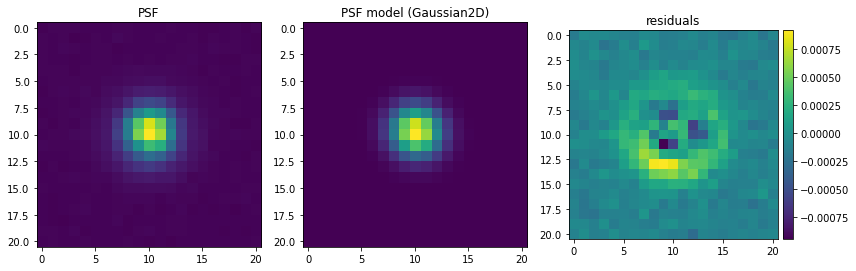

In [10]:
from prose import viz

print(f"model: {image.psf_model_block}")
print("fwhmx, fwhmy, theta: " + ", ".join([f"{p:.2f}" for p in block.fwhm(image.psf_models_params)]))

plt.figure(figsize=(12, 5))

plt.subplot(131)
plt.imshow(image.psf)
plt.title("PSF")

plt.subplot(132)
plt.imshow(image.psf_model)
plt.title(f"PSF model ({image.psf_model_block})")

plt.subplot(133)
residuals = image.psf - image.psf_model
ax = plt.imshow(residuals)
plt.title("residuals")
viz.add_colorbar(ax)

plt.tight_layout()

model: Gaussian2D
fwhmx, fwhmy, theta: 3.78, 3.61, -1.02


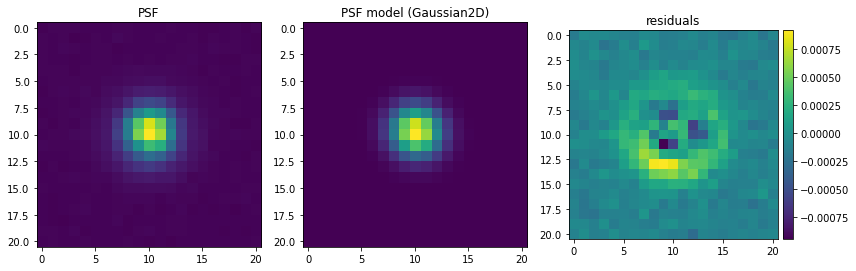

In [11]:
from prose import viz

print(f"model: {image.psf_model_block}")
print("fwhmx, fwhmy, theta: " + ", ".join([f"{p:.2f}" for p in block.fwhm(image.psf_models_params)]))

plt.figure(figsize=(12, 5))

plt.subplot(131)
plt.imshow(image.psf)
plt.title("PSF")

plt.subplot(132)
plt.imshow(image.psf_model)
plt.title(f"PSF model ({image.psf_model_block})")

plt.subplot(133)
residuals = image.psf - image.psf_model
ax = plt.imshow(residuals)
plt.title("residuals")
viz.add_colorbar(ax)

plt.tight_layout()

## Moffat2D

In [12]:
from prose import blocks, Sequence
from prose.tutorials import example_image

# our example image
image = example_image()

# Sequence to build image PSF
sequence = Sequence([
    blocks.SegmentedPeaks(),  # stars detection
    blocks.Cutouts(),
    blocks.MedianPSF(),       # building PSF
])

sequence.run([image])

RUN 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 65.40images/s]


In [13]:
import matplotlib.pyplot as plt

block = blocks.psf.Moffat2D()
image = block(image)

model: Moffat2D
fwhmx, fwhmy, theta: 3.65, 3.48, 0.00


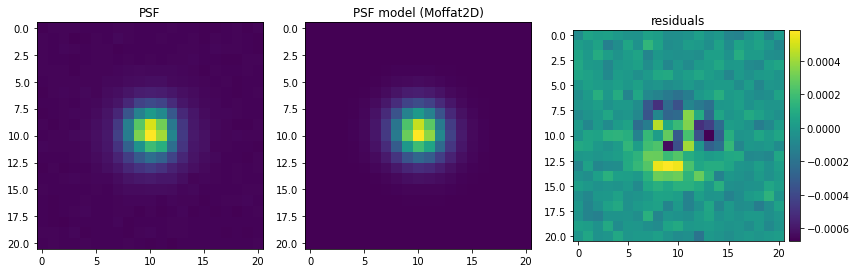

In [14]:
from prose import viz

print(f"model: {image.psf_model_block}")
print("fwhmx, fwhmy, theta: " + ", ".join([f"{p:.2f}" for p in block.fwhm(image.psf_models_params)]))

plt.figure(figsize=(12, 5))

plt.subplot(131)
plt.imshow(image.psf)
plt.title("PSF")

plt.subplot(132)
plt.imshow(image.psf_model)
plt.title(f"PSF model ({image.psf_model_block})")

plt.subplot(133)
residuals = image.psf - image.psf_model
ax = plt.imshow(residuals)
plt.title("residuals")
viz.add_colorbar(ax)

plt.tight_layout()

# Telescope

In [15]:
from prose import Telescope

telescope_dict = dict(
    # Name(s)
    # -------
    name = "Unknown",
    names = [],

    # Keywords
    # --------
    keyword_telescope = "TELESCOP",
    keyword_object = "OBJECT",
    keyword_image_type = "IMAGETYP",
    keyword_light_images = "light",
    keyword_dark_images = "dark",
    keyword_flat_images = "flat",
    keyword_bias_images = "bias",
    keyword_observation_date = "DATE-OBS",
    keyword_exposure_time = "EXPTIME",
    keyword_filter = "FILTER",
    keyword_airmass = "AIRMASS",
    keyword_fwhm = "FWHM",
    keyword_seeing = "SEEING",
    keyword_ra = "RA",
    keyword_dec = "DEC",
    keyword_jd = "JD",
    keyword_bjd = "BJD",
    keyword_flip = "PIERSIDE",
    keyword_observation_time = None,

    # Units, formats and scales
    # -------------------------
    ra_unit = "deg",
    dec_unit = "deg",
    jd_scale = "utc",
    bjd_scale = "utc",
    mjd = 0,
    
    # Specs
    # -----
    trimming = (0, 0), # in piwel along y/x
    read_noise = 9, # in A
    gain = 1, # in e-/ADU
    altitude = 2000, # in meters
    diameter = 100, # in meters
    pixel_scale = None, # in arcseconds
    latlong = [None, None], 
    saturation = 55000,
    hdu = 0
)

telescope = Telescope(telescope_dict)

Telescope 'unknown' saved


# Image object

## Example

The image object contains data and metadata from a FITS image. Let's instantiate an example

In [16]:
from prose.tutorials import image_sample

image = image_sample("05 38 44.851", "+04 32 47.68")

INFO Querying https://archive.stsci.edu/cgi-bin/dss_form


We can show the image with

<AxesSubplot:>

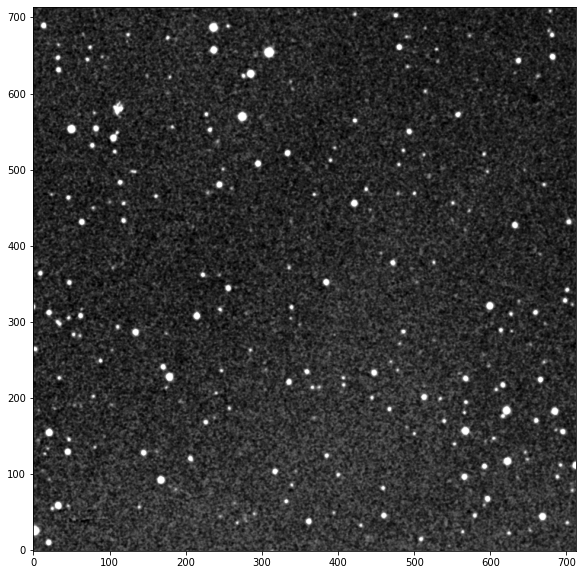

In [17]:
image.show()

with its header lying in 

In [18]:
image.header[0:10] # the 10 first lines

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  713 /FITS: X Dimension                               
NAXIS2  =                  714 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2022-09-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'POSSI-O '           /GSSS: Sky Survey                                
REGION  = 'XO538   '           /GSSS: Region Name                               

Once this object is instantiated, its parameters are mapped to the ones of the telescope, detected from the header information. This exposes conveniant attributres, for example:

In [19]:
print(f"pixel scale : {image.pixel_scale:.2f}\n"
      f"FOV: {image.fov}\n"
      f"night: {image.night_date}\n")

pixel scale : 1.01 arcsec
FOV: [0.20003263 0.20031318] deg
night: 1955-11-22



some of them being directly translated into astropy Quantity or datetime object. 

Such data can then be accesed and modified by blocks (see)

# SegmentedPeaks

In [20]:
from prose.tutorials import example_image

image = example_image()

The simplest way to run this detection block is

<AxesSubplot:>

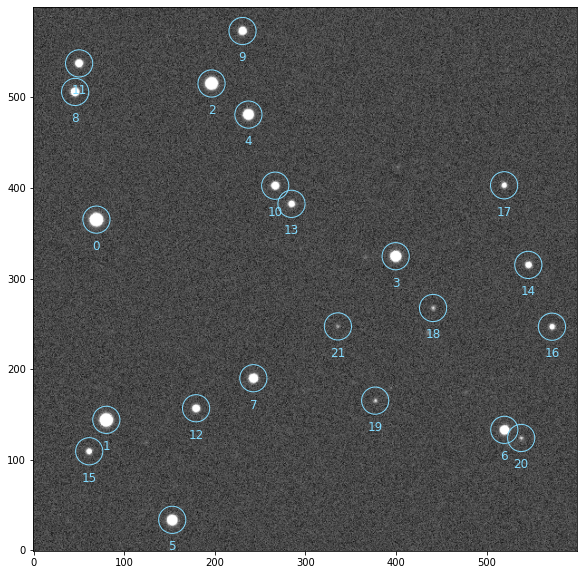

In [21]:
from prose.blocks import SegmentedPeaks

image = SegmentedPeaks()(image)
image.show()

The number of stars can be easily constrained with

<AxesSubplot:>

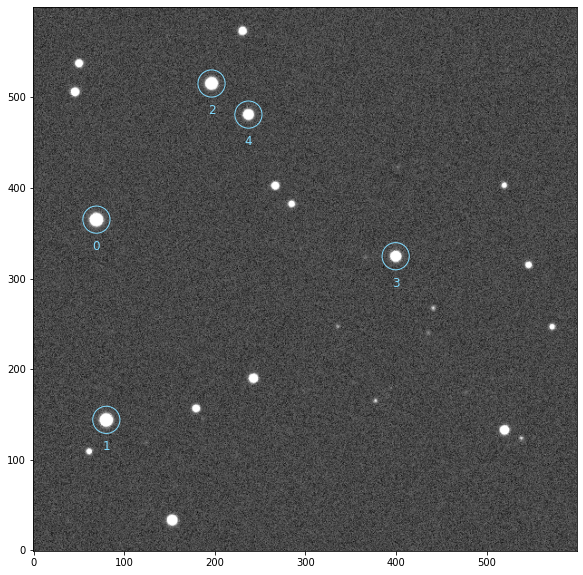

In [22]:
image = SegmentedPeaks(n_stars=5)(image)
image.show()

The function relies on the `threshold` parameter that can be auto-computed to reach an desired number of stars

INFO SegmentedPeaks threshold optimisation ...
INFO threshold = 1.30


<AxesSubplot:>

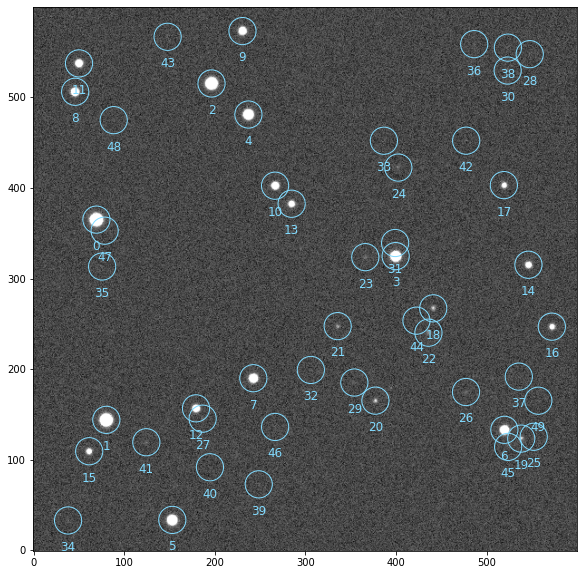

In [23]:
image = SegmentedPeaks(n_stars=50, auto=True, verbose=True)(image)
image.show()

however threshold optimisation is slow. When processing multiple images (in a `Sequence` for example) you can provide a reference image on which the threshold can be optimized once

In [24]:
from tqdm.auto import tqdm

print("threshold optimisation for multiple images")
# -------------------------------------------------
for _ in tqdm(range(3)):
    SegmentedPeaks(n_stars=15, auto=True)(image)
    
    
print("threshold optimisation once")
# ----------------------------------
detection = SegmentedPeaks(n_stars=15, reference=image)

for _ in tqdm(range(3)):
    detection(image)

threshold optimisation for multiple images


  0%|          | 0/3 [00:00<?, ?it/s]

threshold optimisation once


  0%|          | 0/3 [00:00<?, ?it/s]